# Customer Clustering and Prediction using K-Means and ANN Architecture
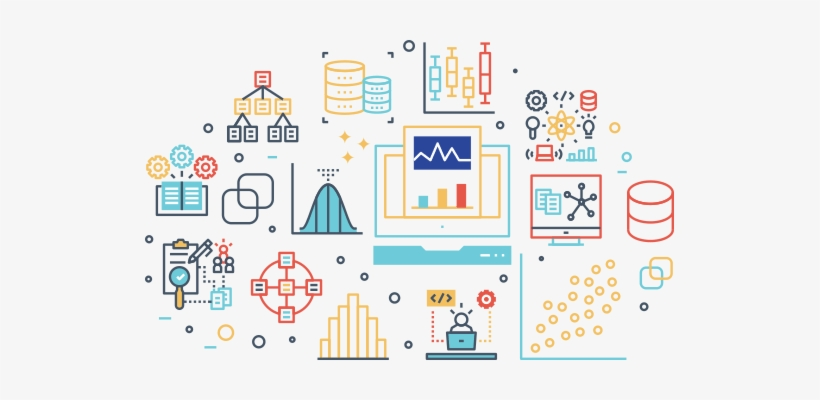

# Importing the Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

# Reading the Dataset

In [61]:
df = pd.read_csv("segmentation data.csv")
dff=df.copy()
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [62]:
df.shape

(2000, 8)

In [63]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


# Data Cleaning

<AxesSubplot:>

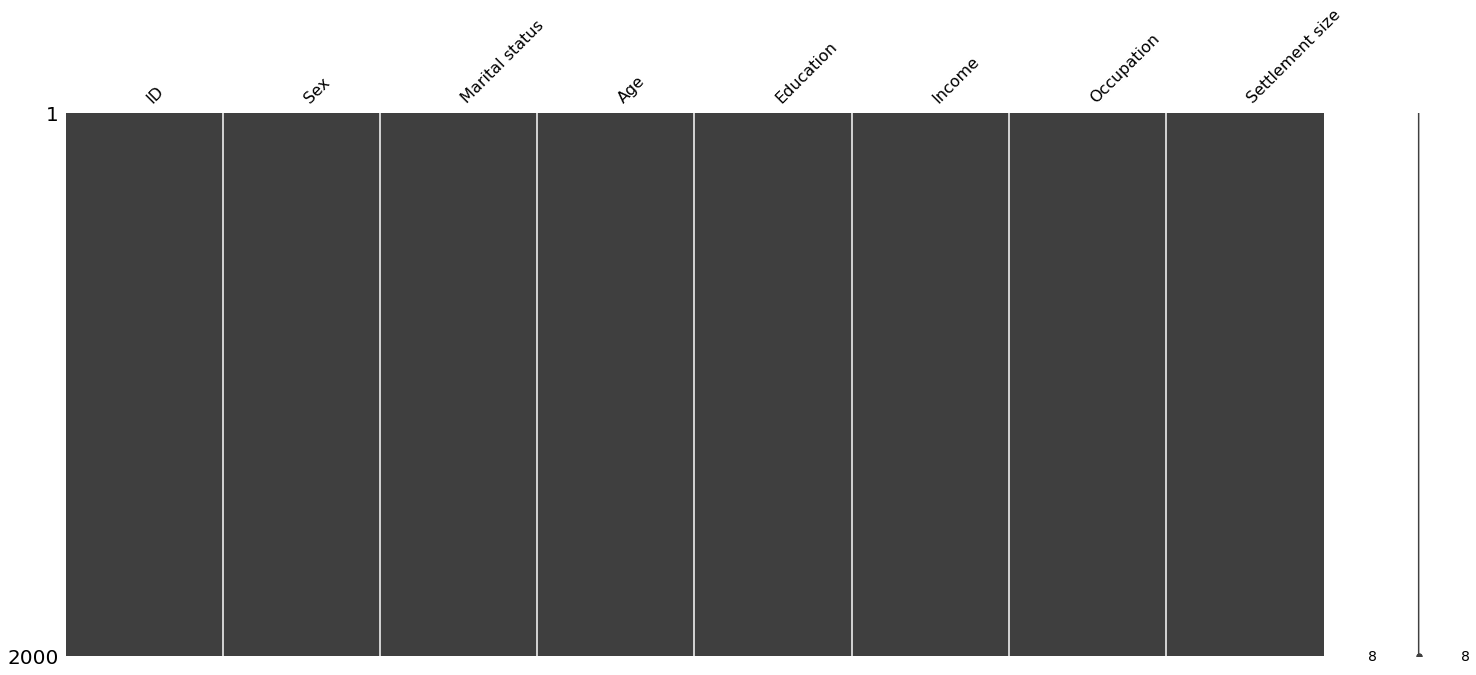

In [65]:
import missingno as m
m.matrix(df)

### Data is already Cleaned

# Labeling the Categorical Variables for Better Vusial Understanding 

In [66]:
df["Sex"] = df["Sex"].replace({0: "Male" , 1: "Female"})
df["Marital status"] = df["Marital status"].replace({0: "Single" , 1: "Non-Single"})
df["Education"] = df["Education"].replace({0: "Others" , 1: "High School", 2: "University", 3: "Graduate"})
df["Occupation"] = df["Occupation"].replace({0: "Unemployed / Unskilled" , 1: "Skilled Employee / Official", 2: "Highly Qualified"})
df["Settlement size"] = df["Settlement size"].replace({0: "Small City" , 1: "Mid-Sized City", 2: "Big City"})

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Male,Single,67,University,124670,Skilled Employee / Official,Big City
1,100000002,Female,Non-Single,22,High School,150773,Skilled Employee / Official,Big City
2,100000003,Male,Single,49,High School,89210,Unemployed / Unskilled,Small City
3,100000004,Male,Single,45,High School,171565,Skilled Employee / Official,Mid-Sized City
4,100000005,Male,Single,53,High School,149031,Skilled Employee / Official,Mid-Sized City


# Dropping the ID Column

In [67]:
df = df.drop(columns='ID')
dff = dff.drop(columns='ID')

# Data Visualization

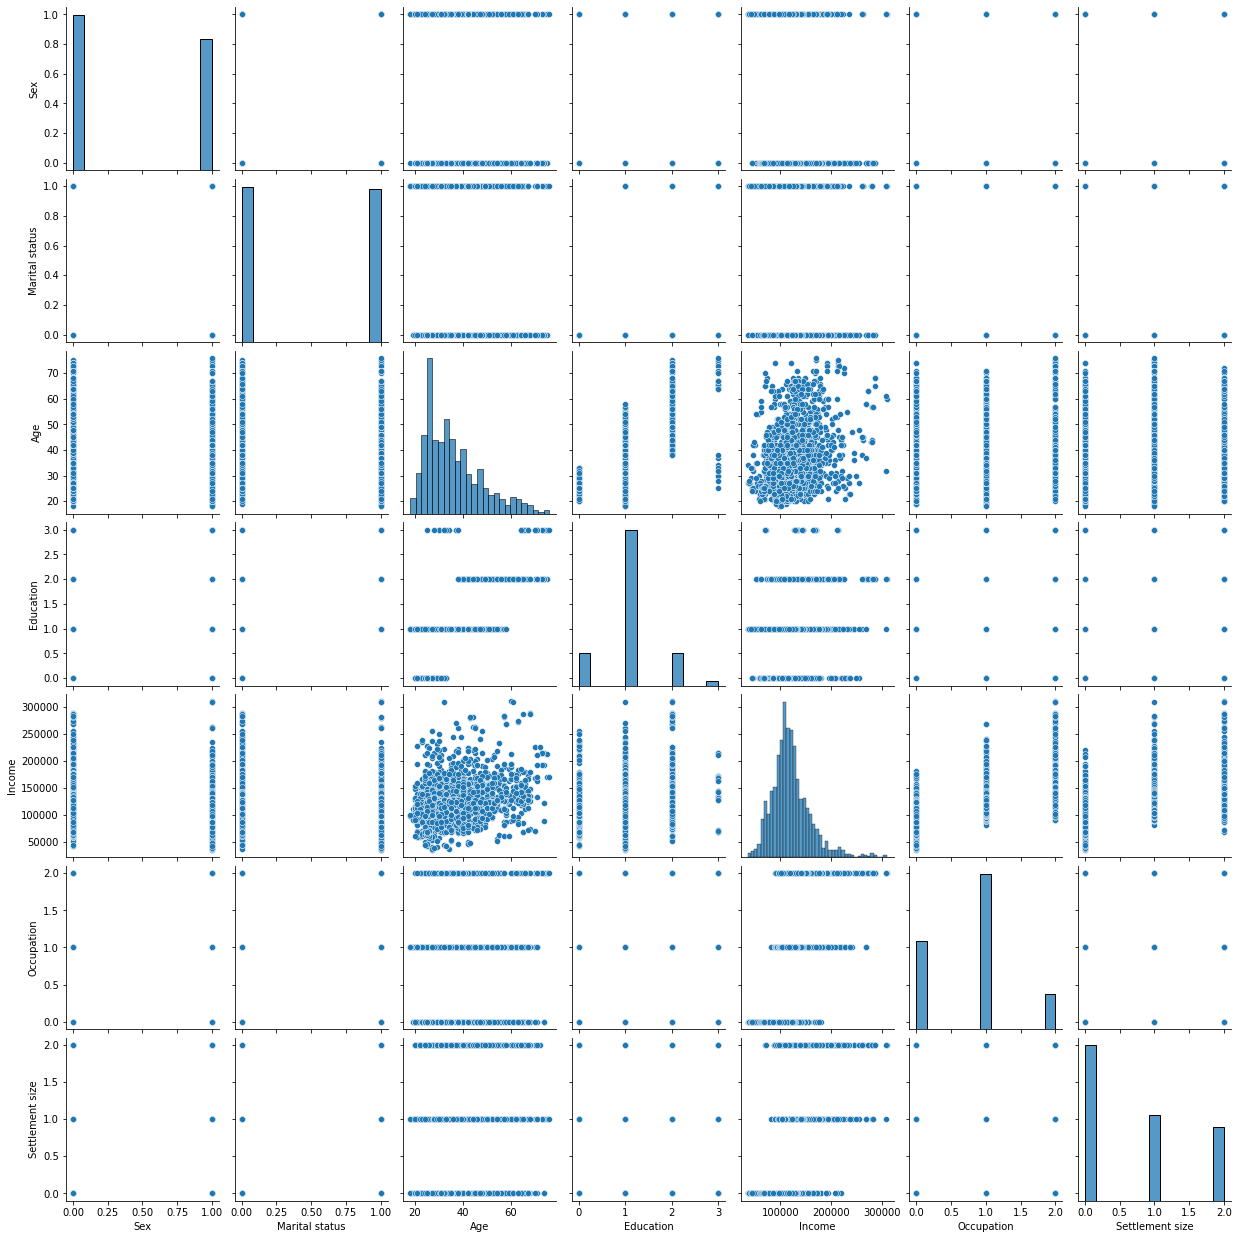

In [68]:
sns.pairplot(dff)

### From the pairplot It is Understood that Columns does not have Co-relation

In [69]:
fig = px.histogram(df, x="Education", color = "Sex", title="Education with Sex Plot")
fig.show()

In [70]:
fig = px.histogram(df, x="Marital status", color = "Sex", title="Marital Status with Sex Plot")
fig.show()

In [71]:
fig = px.box(df, y="Income", color = "Occupation", points='all', title="Income with Occupation Plot")
fig.show()

In [72]:
fig = px.violin(df, y="Income", color = "Education", points='all', box= True, title = "Income with Education Plot")
fig.show()

In [73]:
fig = px.histogram(df, x="Education", color = "Settlement size", title= "Education with Settlement Size plot")
fig.show()

In [74]:
fig = px.bar(df, x="Age", y='Income' ,color = "Education", title= "Age, Income with Education Plot")
fig.show()

In [75]:
fig = px.bar(df, x="Age", y='Income' ,color = "Settlement size", title="Age, Income with Settlement Size Plot")
fig.show()

# Heatmap

<AxesSubplot:>

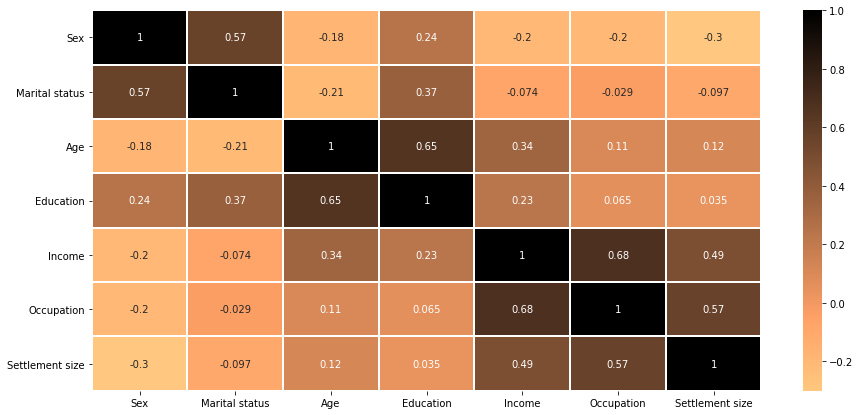

In [76]:
plt.figure(figsize=(15,7))
sns.heatmap(dff.corr(), annot = True, linewidth=1, cmap="copper_r")

# Unlabeled Data

In [77]:
dff.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


# Elbow Method for Determining the K Value

In [78]:
from sklearn.cluster import KMeans
X3 = dff.values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, random_state= 111) )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

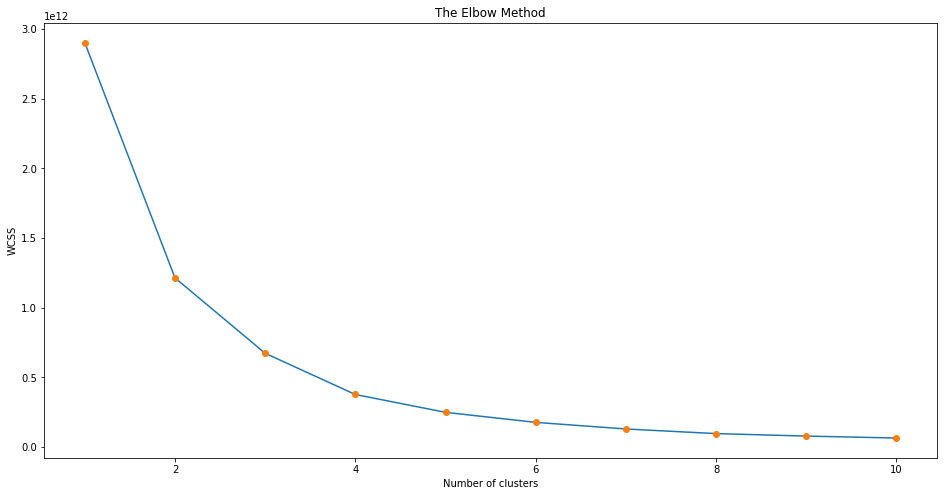

In [79]:
wcss = []
plt.figure(figsize = (16, 8))
for i in range(1, 11):
    Kmeans = KMeans(n_clusters = i, random_state = 42)
    Kmeans.fit(X3)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.plot(np.arange(1 , 11) , wcss , 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Building K-Means Model with 4 Clusters

In [80]:
algorithm = (KMeans(n_clusters = 4 , random_state= 111))
algorithm.fit(X3)
clusters = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [81]:
dff['clusters'] =  clusters

# Labeled Data

In [82]:
dff.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


# Replacing the Labels with Cluster Name

In [83]:
dff['clusters'] = dff['clusters'].replace([0],'Cluster 1')
dff['clusters'] = dff['clusters'].replace([1],'Cluster 2')
dff['clusters'] = dff['clusters'].replace([2],'Cluster 3')
dff['clusters'] = dff['clusters'].replace([3],'Cluster 4')

In [84]:
dff.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,0,0,67,2,124670,1,2,Cluster 4
1,1,1,22,1,150773,1,2,Cluster 1
2,0,0,49,1,89210,0,0,Cluster 2
3,0,0,45,1,171565,1,1,Cluster 1
4,0,0,53,1,149031,1,1,Cluster 1


# Samples Before and After K-Means Clsutering 

In [85]:
fig = px.scatter_3d(dff, x='Age', y='Income', z='Education',title="Before K-Means Clustering")              
fig.show()

In [86]:
fig = px.scatter_3d(dff, x='Age', y='Income', z='Education', color='clusters',title="After K-Means Clustering")              
fig.show()

In [87]:
fig = px.scatter_3d(dff, y='Age', x='Income', z='Settlement size',title="Before K-Means Clustering")              
fig.show()

In [88]:
fig = px.scatter_3d(dff, y='Age', x='Income', z='Settlement size', color='clusters',title="After K-Means Clustering")              
fig.show()

In [89]:
fig = px.scatter_3d(dff, z='Age', y='Income', x='Occupation',title="Before K-Means Clustering")              
fig.show()

In [90]:
fig = px.scatter_3d(dff, z='Age', y='Income', x='Occupation', color='clusters',title="After K-Means Clustering")              
fig.show()

In [91]:
fig = px.scatter_3d(dff, x='Age', y='Income', z='Marital status',title="Before K-Means Clustering")              
fig.show()

In [92]:
fig = px.scatter_3d(dff, x='Age', y='Income', z='Marital status', color='clusters',title="After K-Means Clustering")              
fig.show()

In [93]:
fig = px.scatter_3d(dff, x='Age', z='Income', y='Sex',title="Before K-Means Clustering")              
fig.show()

In [94]:
fig = px.scatter_3d(dff, x='Age', z='Income', y='Sex', color='clusters',title="After K-Means Clustering")              
fig.show()

# Mean of Income of Every Clusters

In [95]:
print("Average Income of Cluster 1 : ",dff[dff['clusters']=='Cluster 1'].Income.mean())
print("Average Income of Cluster 2 : ",dff[dff['clusters']=='Cluster 2'].Income.mean())
print("Average Income of Cluster 3 : ",dff[dff['clusters']=='Cluster 3'].Income.mean())
print("Average Income of Cluster 4 : ",dff[dff['clusters']=='Cluster 4'].Income.mean())

Average Income of Cluster 1 :  154064.47494553376
Average Income of Cluster 2 :  79085.61283643893
Average Income of Cluster 3 :  225124.86666666667
Average Income of Cluster 4 :  114750.03357817419


# Based on Imcome Replacing the Cluster Name with Designation
####    Cluster 2 - Fresher
####    Cluster 4 - Mid-Senior
####    Cluster 1 - Senior
####    Cluster 3 - Higher

In [96]:
dff['clusters'] = dff['clusters'].replace(['Cluster 2'],'Fresher')
dff['clusters'] = dff['clusters'].replace(['Cluster 4'],'Mid-Senior')
dff['clusters'] = dff['clusters'].replace(['Cluster 1'],'Senior')
dff['clusters'] = dff['clusters'].replace(['Cluster 3'],'Higher')

# Renaming the Column name Clusters to Designation

In [97]:
dff = dff.rename(columns={'clusters': 'Designation'})

In [98]:
dff.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Designation
0,0,0,67,2,124670,1,2,Mid-Senior
1,1,1,22,1,150773,1,2,Senior
2,0,0,49,1,89210,0,0,Fresher
3,0,0,45,1,171565,1,1,Senior
4,0,0,53,1,149031,1,1,Senior


In [99]:
dff.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'Designation'],
      dtype='object')

# Making Dummy Variables of Designation Column

In [100]:
df1 = pd.get_dummies(dff['Designation'])

In [101]:
df1.head()

,Fresher,Higher,Mid-Senior,Senior
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


# X and y Split


In [102]:
X = dff[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation','Settlement size']].values
y=df1.values

In [103]:
X

array([[     0,      0,     67, ..., 124670,      1,      2],
       [     1,      1,     22, ..., 150773,      1,      2],
       [     0,      0,     49, ...,  89210,      0,      0],
       ...,
       [     0,      0,     31, ...,  86400,      0,      0],
       [     1,      1,     24, ...,  97968,      0,      0],
       [     0,      0,     25, ...,  68416,      0,      0]], dtype=int64)

In [104]:
y

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]], dtype=uint8)

# Train Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling 

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building ANN Model with 3 Hidden Layers

In [107]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='sigmoid'))

## Compiling the Model with ADAM Optimizer and Binary Crossentropy Loss Function

In [108]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the Dataset Into Model

In [109]:
history = ann.fit(X_train, y_train, batch_size = 32, validation_data=(X_test,y_test) ,epochs = 100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
28/50 [===============>..............] - ETA: 0s - loss: 0.6603 - accuracy: 0.3248WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000028D0527C840> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

50/50 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9737 - val_loss: 0.0494 - val_accuracy: 0.9675
Epoch 46/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9744 - val_loss: 0.0475 - val_accuracy: 0.9675
Epoch 47/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9787 - val_loss: 0.0455 - val_accuracy: 0.9675
Epoch 48/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9806 - val_loss: 0.0446 - val_accuracy: 0.9700
Epoch 49/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9800 - val_loss: 0.0445 - val_accuracy: 0.9650
Epoch 50/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9831 - val_loss: 0.0440 - val_accuracy: 0.9700
Epoch 51/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9825 - val_loss: 0.0419 - val_accuracy: 0.9750
Epoch 52/100
50/50 

In [110]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy vs Validation Accuracy Plot

In [111]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=history.history['accuracy'], name='Accuracy',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(y=history.history['val_accuracy'], name = 'Validation Accuracy',
                         line=dict(color='firebrick', width=5)))

# Loss vs Validation Loss Plot


In [112]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=history.history['loss'], name='Loss',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(y=history.history['val_loss'], name = 'Validation Loss',
                         line=dict(color='firebrick', width=5)))

# Prediction on Test Set

In [113]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [114]:
y_pred = np.where(y_pred == 'False',0, y_pred)

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [115]:
y_pred, y_test

(array([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        ...,
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0]]),
 array([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        ...,
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0]], dtype=uint8))

# Accuracy

In [124]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.9831487563


# Classification Report

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       1.00      0.95      0.97        20
           2       0.97      0.97      0.97       180
           3       0.99      0.99      0.99        98

   micro avg       0.98      0.98      0.98       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.98      0.98       400
 samples avg       0.97      0.98      0.98       400



C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



# Initially I have a Unlabeled Dataset 
# Applied Elbow Method and Found out the K Value
# Performed a K-Means Clustering and got Clustered Data
# Converted The Clustered Data into Proper Label
# Split the dataset into X and y, then Train test 
# Performed 3 Layer ANN Architecture to Classify 
# At the End Model can Classify the Designation of a Customer with an Accuracy of 98%